# EDA (Exploratory Data Analysis) of the Abalone Dataset

## Project Overview
This notebook explores the Abalone dataset to understand the relationship between physical measurements and age (rings) of abalone. The goal is to predict abalone age using physical measurements instead of the time-consuming method of counting shell rings under a microscope.

## Dataset Information
- **Target Variable**: Age (calculated as Rings + 1.5)
- **Features**: Physical measurements (Length, Diameter, Height, Weights) and Sex
- **Problem Type**: Regression (predicting continuous age values)

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [2]:
%load_ext autoreload
%autoreload 2

import kagglehub
# Download latest version
path = kagglehub.dataset_download("rodolfomendes/abalone-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/gustavetriomphe/.cache/kagglehub/datasets/rodolfomendes/abalone-dataset/versions/3


## 1. Data Loading and Basic Information

In [3]:
import os
# kagglehub returns a directory path, we need to specify the CSV file
csv_path = os.path.join(path, 'abalone.csv')
df = pd.read_csv(csv_path)

# Save a copy to data directory for future use
os.makedirs('../data', exist_ok=True)
df.to_csv('../data/abalone.csv', index=False)

In [4]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nColumn names:")
print(df.columns.tolist())

Dataset Shape: (4177, 9)

First 5 rows:
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4

## 2. Data Quality Analysis

In [5]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 40)
missing_values = df.isnull().sum()
print("Null values per column:")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Check data types
print("\nData Types:")
print(df.dtypes)

Missing Values Analysis:
Null values per column:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Total missing values: 0

Duplicate rows: 0

Data Types:
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object


✅ **Data Quality Summary**: The dataset has no missing values and no duplicate rows, making it clean and ready for analysis.

In [6]:
# Statistical summary of numerical features
print("Statistical Summary:")
print("=" * 50)
print(df.describe())

# Check unique values in categorical column
print(f"\nUnique values in 'Sex' column: {df['Sex'].unique()}")
print(f"Sex distribution:")
print(df['Sex'].value_counts())


Statistical Summary:
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500

In [7]:
## 3. Target Variable Analysis (Age/Rings)

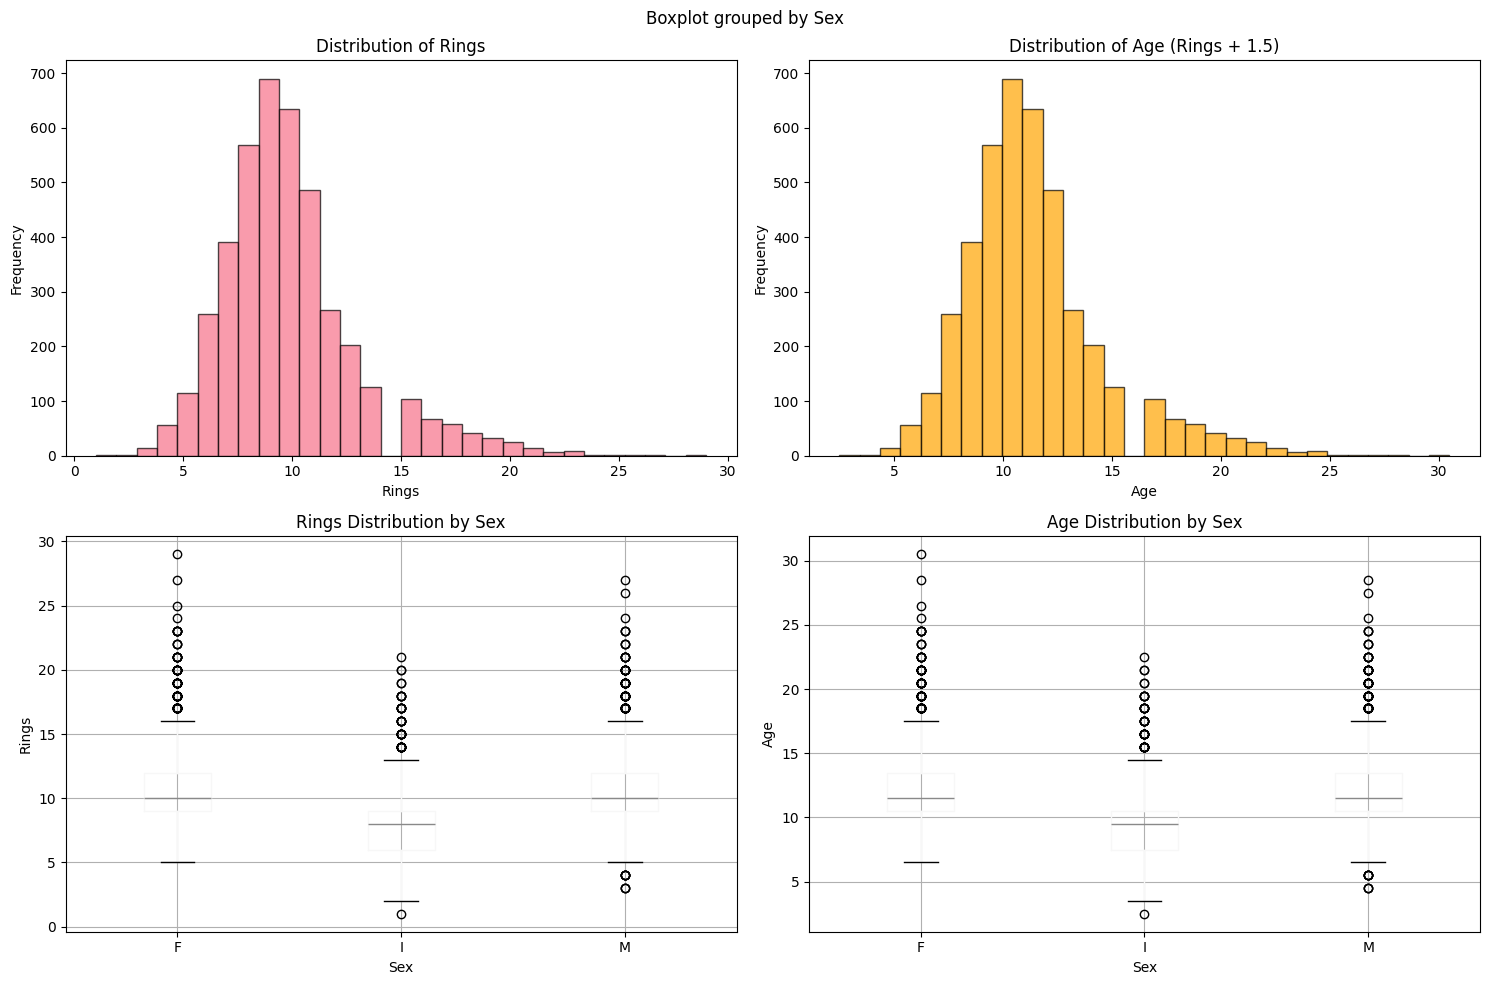

Target Variable Statistics:
Rings - Min: 1, Max: 29, Mean: 9.93
Age - Min: 2.5, Max: 30.5, Mean: 11.43


In [8]:
import matplotlib.pyplot as plt
# Create age variable (Rings + 1.5)
df['Age'] = df['Rings'] + 1.5

# Analyze target variable distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Rings distribution
axes[0,0].hist(df['Rings'], bins=30, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribution of Rings')
axes[0,0].set_xlabel('Rings')
axes[0,0].set_ylabel('Frequency')

# Age distribution
axes[0,1].hist(df['Age'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0,1].set_title('Distribution of Age (Rings + 1.5)')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Frequency')

# Box plot of Rings by Sex
df.boxplot(column='Rings', by='Sex', ax=axes[1,0])
axes[1,0].set_title('Rings Distribution by Sex')
axes[1,0].set_xlabel('Sex')
axes[1,0].set_ylabel('Rings')

# Box plot of Age by Sex
df.boxplot(column='Age', by='Sex', ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Sex')
axes[1,1].set_xlabel('Sex')
axes[1,1].set_ylabel('Age')

plt.tight_layout()
plt.show()

# Target variable statistics
print("Target Variable Statistics:")
print("=" * 40)
print(f"Rings - Min: {df['Rings'].min()}, Max: {df['Rings'].max()}, Mean: {df['Rings'].mean():.2f}")
print(f"Age - Min: {df['Age'].min()}, Max: {df['Age'].max()}, Mean: {df['Age'].mean():.2f}")


Age Group Analysis:
Age_Group
0-5        17
5-10     1390
10-15    2280
15-20     396
20-25      87
25-30       6
Name: count, dtype: int64


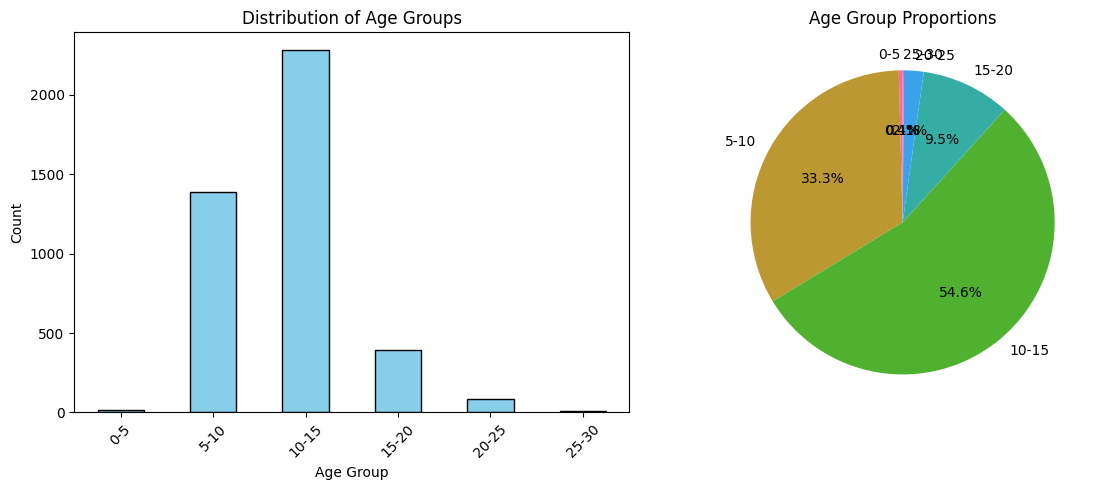

In [9]:
# Age group analysis
print("Age Group Analysis:")
print("=" * 30)

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 5, 10, 15, 20, 25, 30], 
                        labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])

age_group_counts = df['Age_Group'].value_counts().sort_index()
print(age_group_counts)

# Visualize age groups
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Age Group Proportions')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [10]:
## 4. Feature Analysis and Visualizations

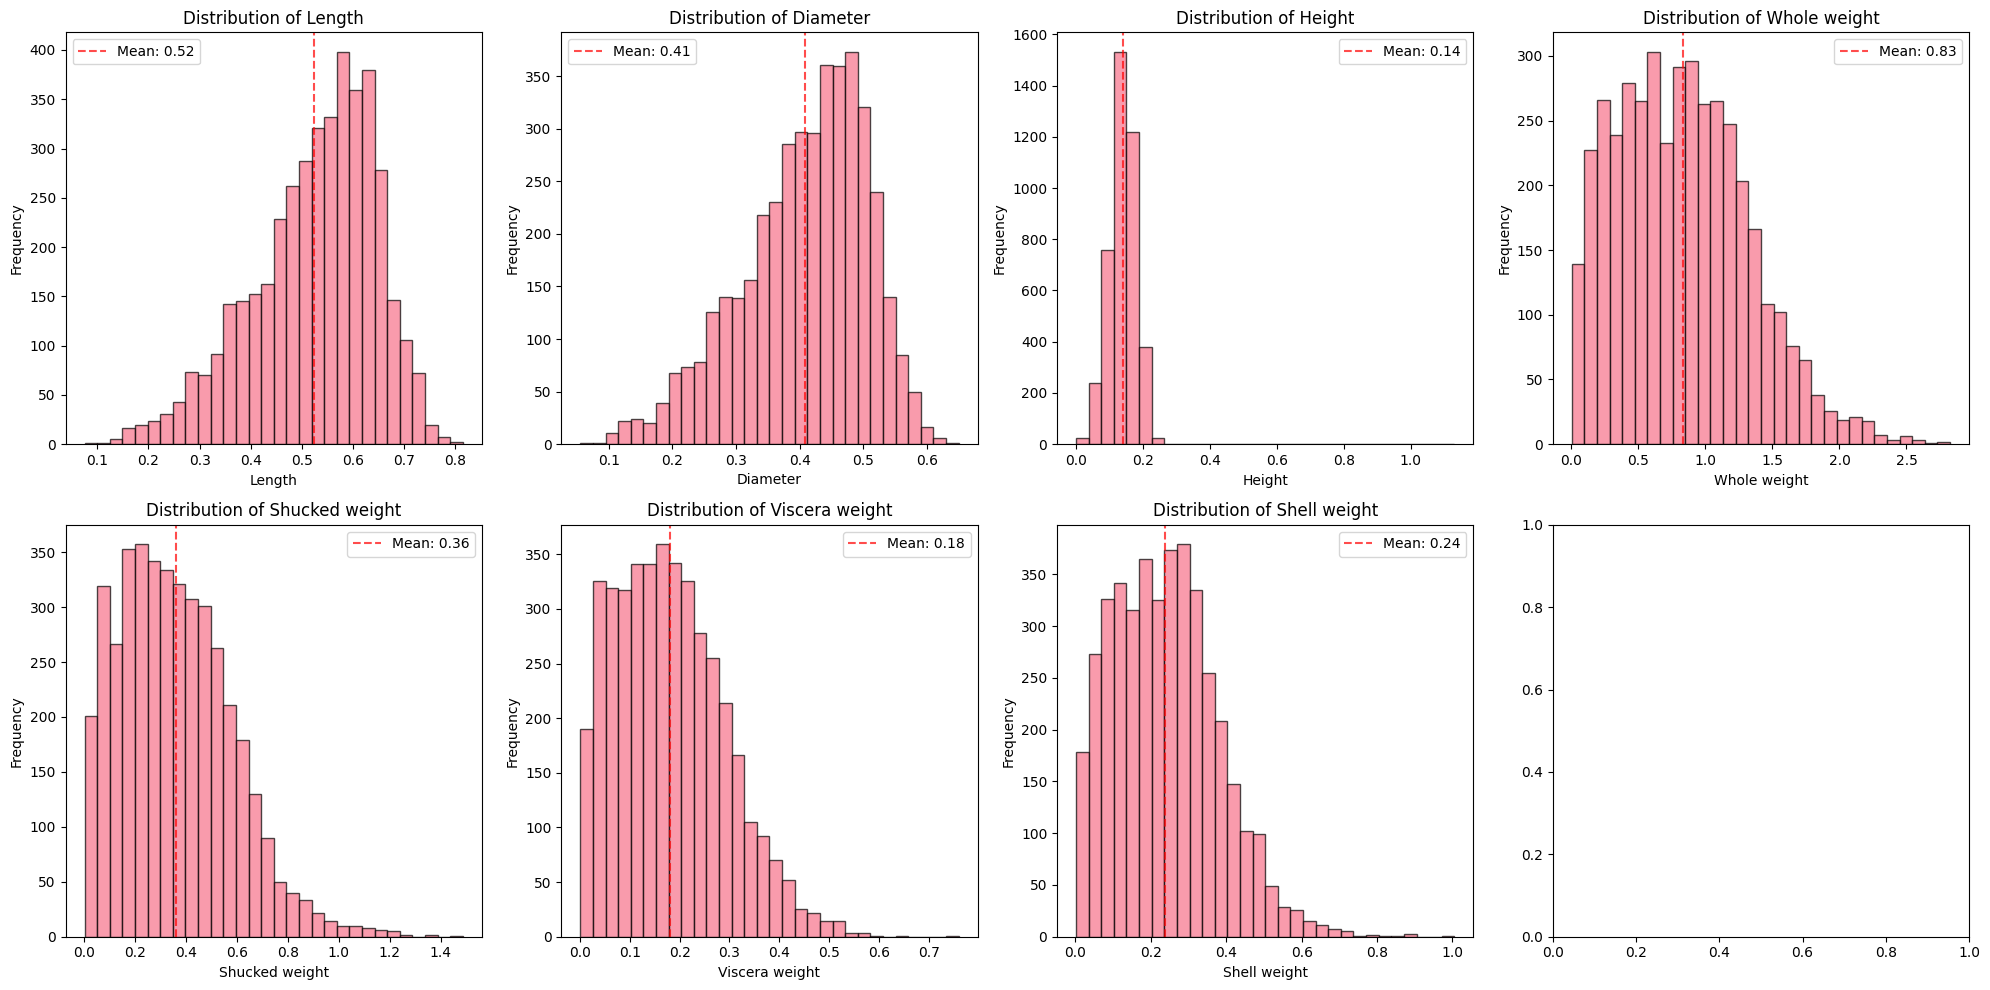

Feature Statistics:
Length: Mean=0.524, Std=0.120, Range=[0.075, 0.815]
Diameter: Mean=0.408, Std=0.099, Range=[0.055, 0.650]
Height: Mean=0.140, Std=0.042, Range=[0.000, 1.130]
Whole weight: Mean=0.829, Std=0.490, Range=[0.002, 2.825]
Shucked weight: Mean=0.359, Std=0.222, Range=[0.001, 1.488]
Viscera weight: Mean=0.181, Std=0.110, Range=[0.001, 0.760]
Shell weight: Mean=0.239, Std=0.139, Range=[0.002, 1.005]


In [11]:
# Individual feature distributions
numerical_features = [
    "Length", "Diameter", "Height", "Whole weight", 
    "Shucked weight", "Viscera weight", "Shell weight"
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Histogram
    axes[i].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
    # Add statistics text
    mean_val = df[feature].mean()
    std_val = df[feature].std()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Feature statistics
print("Feature Statistics:")
print("=" * 50)
for feature in numerical_features:
    print(f"{feature}: Mean={df[feature].mean():.3f}, Std={df[feature].std():.3f}, Range=[{df[feature].min():.3f}, {df[feature].max():.3f}]")


Sex Distribution Analysis:
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

Sex proportions:
Sex
M    0.365813
I    0.321283
F    0.312904
Name: proportion, dtype: float64


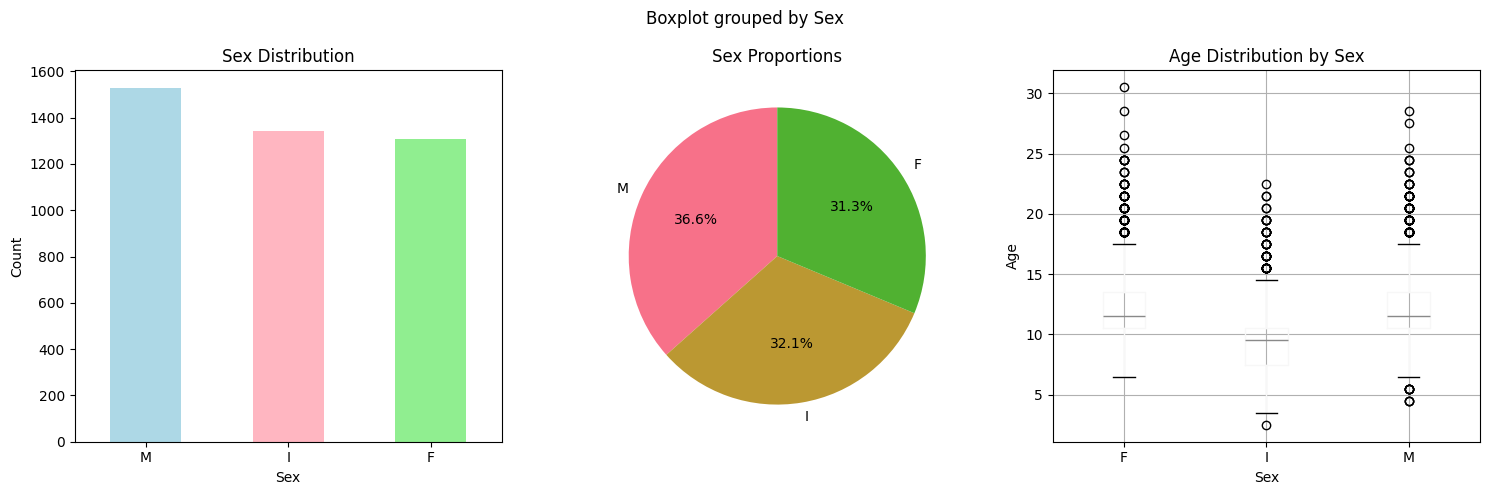


Age Statistics by Sex:
M: Mean=12.21, Median=11.50, Std=3.03
F: Mean=12.63, Median=11.50, Std=3.10
I: Mean=9.39, Median=9.50, Std=2.51


In [12]:
# Categorical feature analysis (Sex)
print("Sex Distribution Analysis:")
print("=" * 40)
sex_counts = df['Sex'].value_counts()
print(sex_counts)
print(f"\nSex proportions:")
print(df['Sex'].value_counts(normalize=True))

# Visualize sex distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Bar plot
sex_counts.plot(kind='bar', ax=axes[0], color=['lightblue', 'lightpink', 'lightgreen'])
axes[0].set_title('Sex Distribution')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
sex_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Sex Proportions')
axes[1].set_ylabel('')

# Age distribution by sex
df.boxplot(column='Age', by='Sex', ax=axes[2])
axes[2].set_title('Age Distribution by Sex')
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('Age')

plt.tight_layout()
plt.show()

# Age statistics by sex
print("\nAge Statistics by Sex:")
print("=" * 30)
for sex in df['Sex'].unique():
    sex_data = df[df['Sex'] == sex]['Age']
    print(f"{sex}: Mean={sex_data.mean():.2f}, Median={sex_data.median():.2f}, Std={sex_data.std():.2f}")


In [13]:
## 5. Correlation Analysis


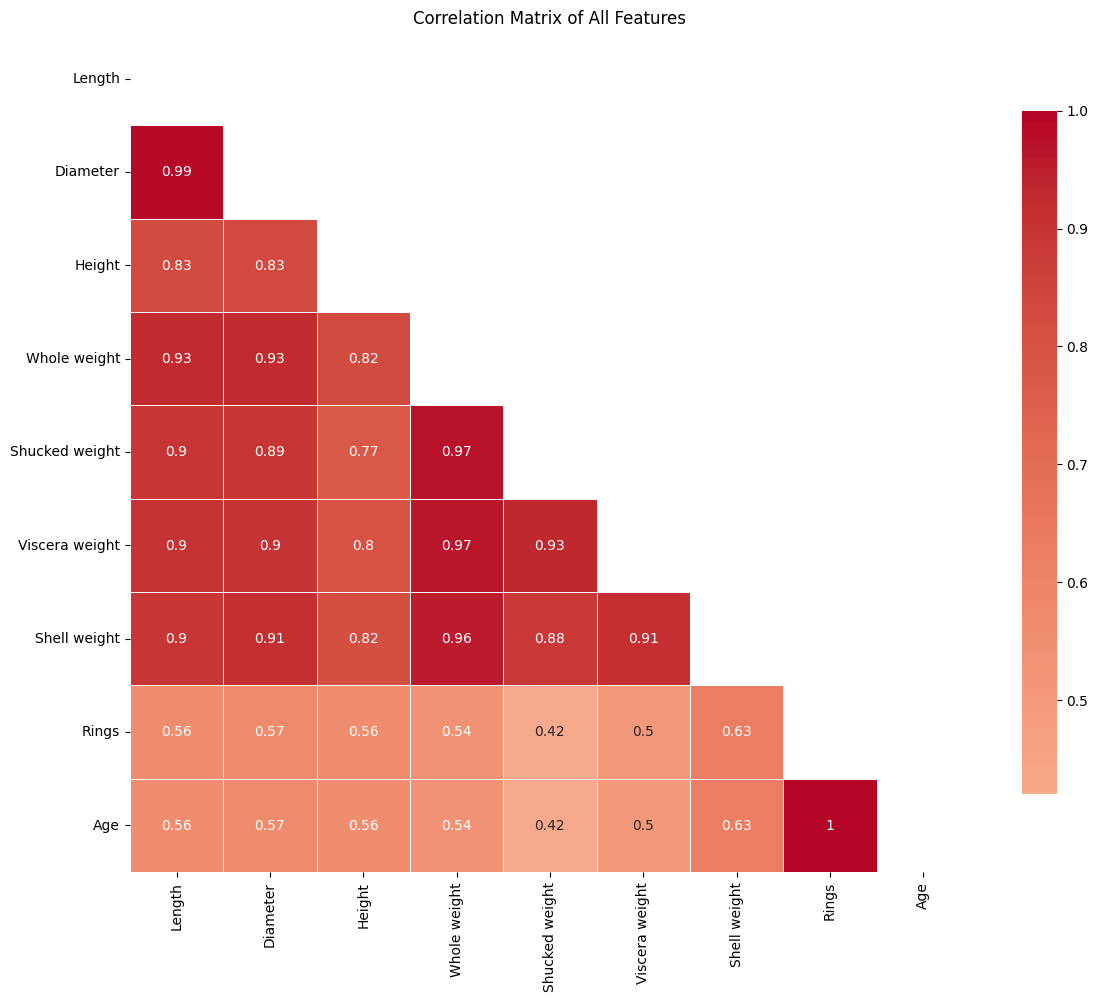

Correlations with Age (Target Variable):
Rings: 1.000
Shell weight: 0.628
Diameter: 0.575
Height: 0.557
Length: 0.557
Whole weight: 0.540
Viscera weight: 0.504
Shucked weight: 0.421


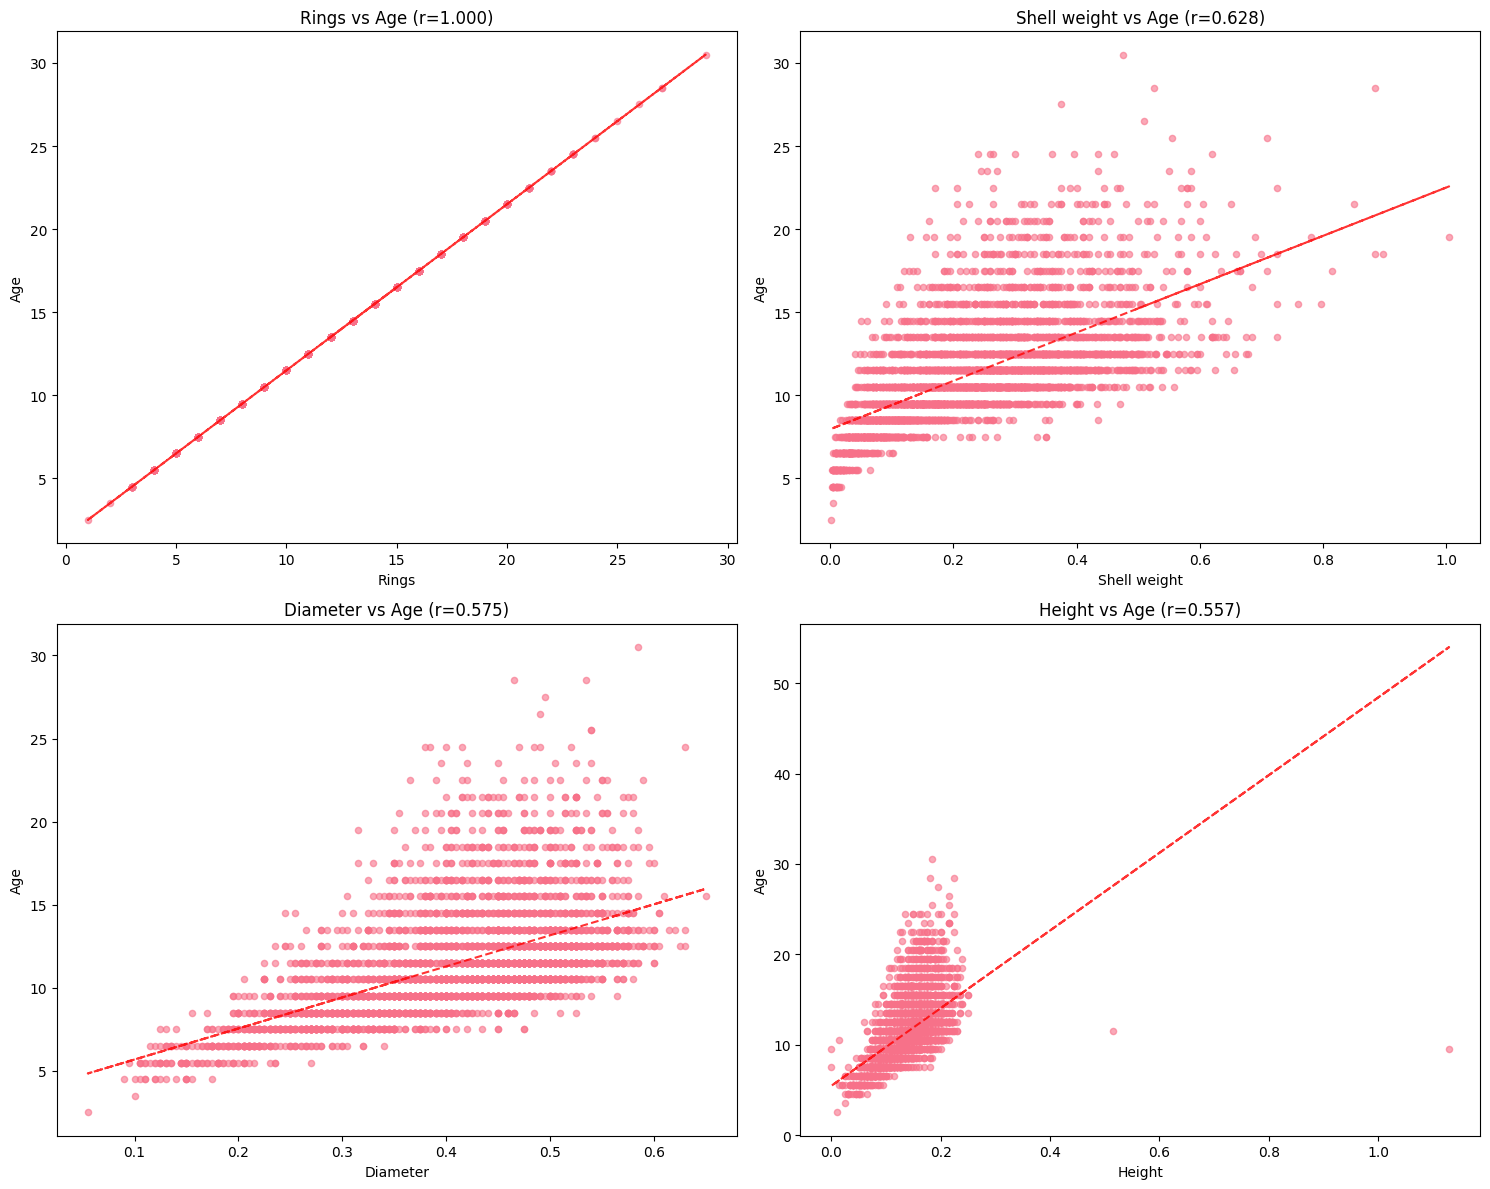

In [14]:
# Correlation matrix
corr_matrix = df[numerical_features + ['Rings', 'Age']].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

# Focus on correlations with target variable
print("Correlations with Age (Target Variable):")
print("=" * 50)
age_correlations = corr_matrix['Age'].drop('Age').sort_values(key=abs, ascending=False)
for feature, corr in age_correlations.items():
    print(f"{feature}: {corr:.3f}")

# Scatter plots of top correlated features with Age
top_features = age_correlations.head(4).index.tolist()
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    axes[i].scatter(df[feature], df['Age'], alpha=0.6, s=20)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Age')
    axes[i].set_title(f'{feature} vs Age (r={age_correlations[feature]:.3f})')
    
    # Add trend line
    z = np.polyfit(df[feature], df['Age'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()


In [15]:
## 6. Feature Relationships and Insights


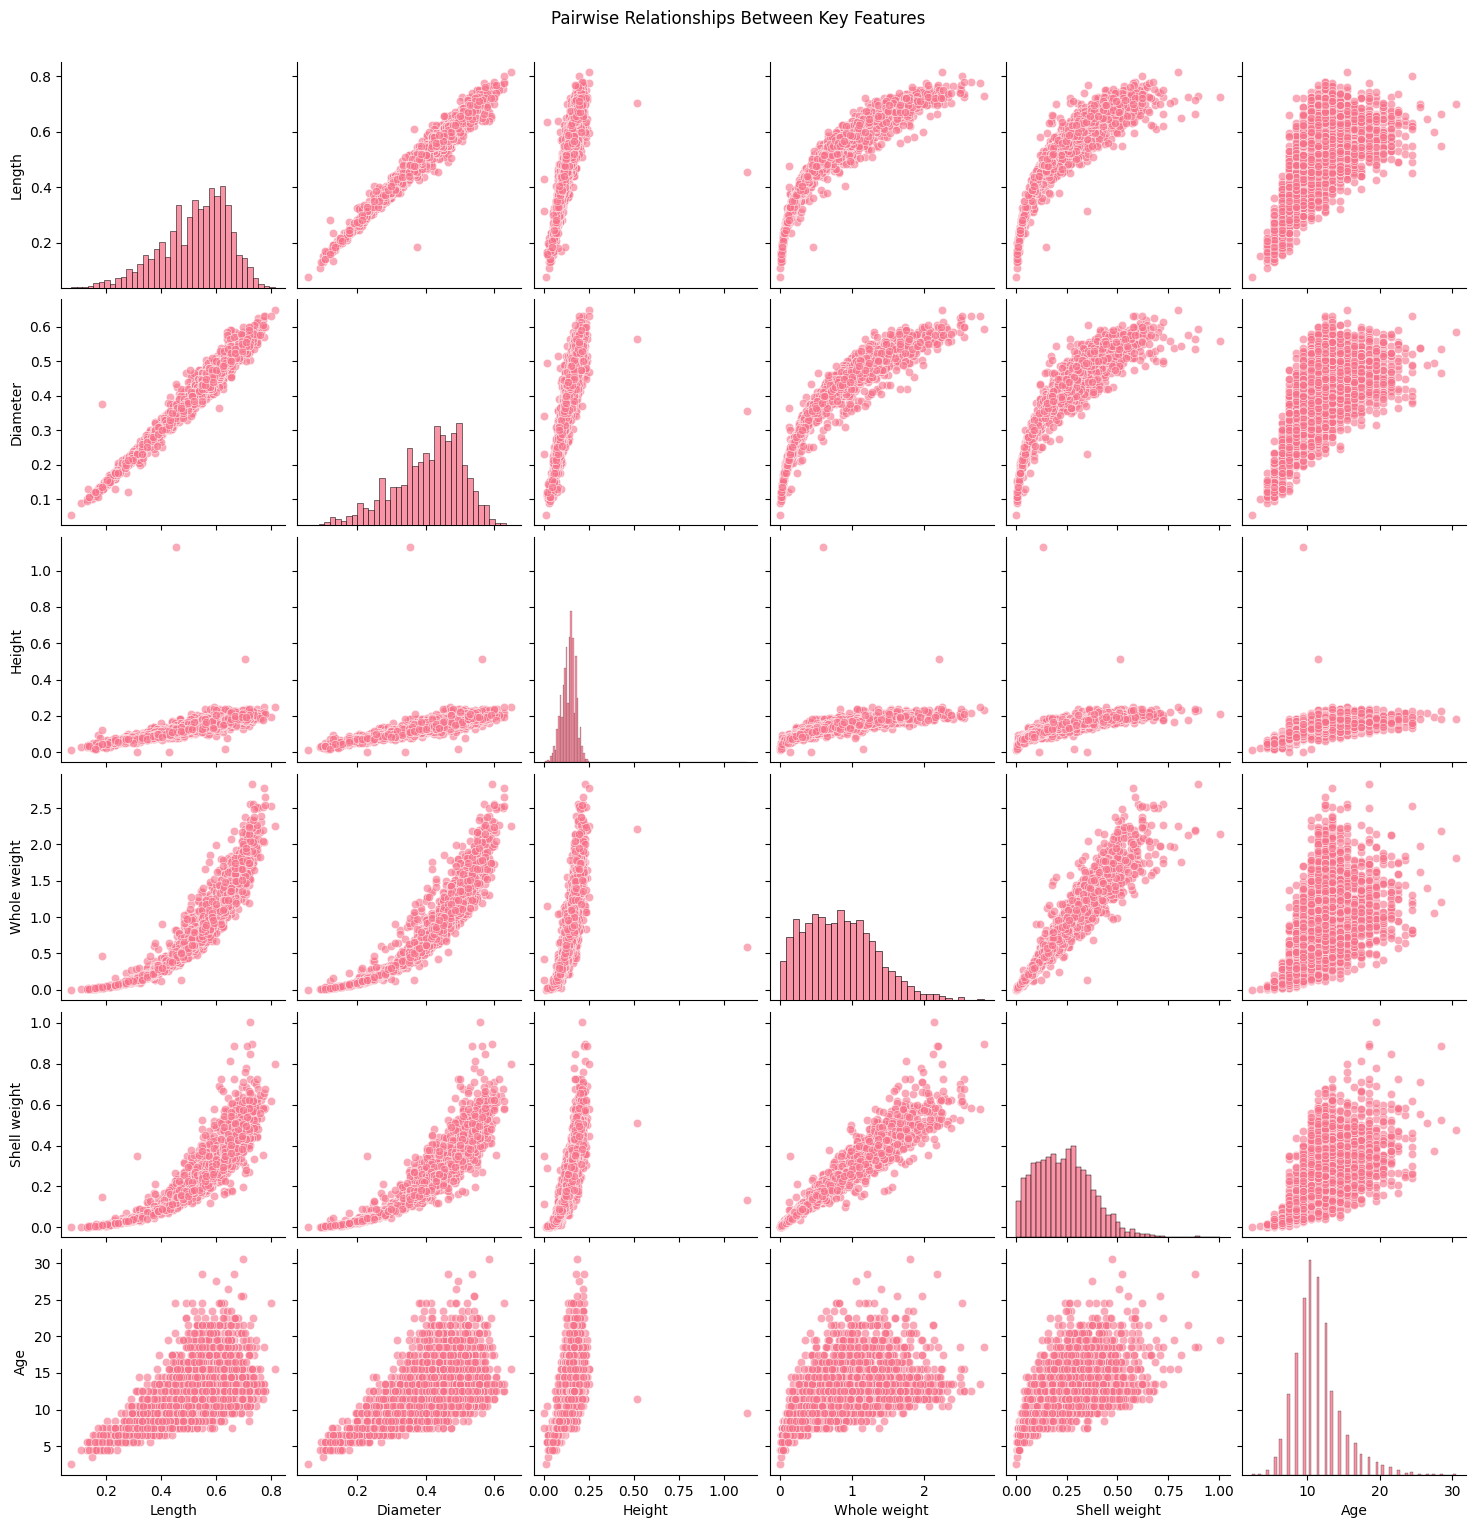

Feature Importance (based on correlation with Age):
1. Rings: 1.000
2. Shell weight: 0.628
3. Diameter: 0.575
4. Height: 0.557
5. Length: 0.557
6. Whole weight: 0.540
7. Viscera weight: 0.504
8. Shucked weight: 0.421

Potential Outliers Analysis:
Length: 49 outliers (1.2%)
Diameter: 59 outliers (1.4%)
Height: 29 outliers (0.7%)
Whole weight: 30 outliers (0.7%)
Shucked weight: 48 outliers (1.1%)
Viscera weight: 26 outliers (0.6%)
Shell weight: 35 outliers (0.8%)


In [16]:
# Pairwise relationships between key features
key_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shell weight', 'Age']

# Create pairplot for key features
g = sns.pairplot(df[key_features], diag_kind='hist', plot_kws={'alpha': 0.6})
g.fig.suptitle('Pairwise Relationships Between Key Features', y=1.02)
plt.show()

# Feature importance based on correlation
print("Feature Importance (based on correlation with Age):")
print("=" * 60)
for i, (feature, corr) in enumerate(age_correlations.items(), 1):
    print(f"{i}. {feature}: {corr:.3f}")

# Check for potential outliers
print("\nPotential Outliers Analysis:")
print("=" * 40)
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")


## 7. Key Insights and Conclusions


In [17]:
# Summary statistics and insights
print("📊 DATASET SUMMARY")
print("=" * 50)
print(f"• Total samples: {len(df):,}")
print(f"• Features: {len(df.columns)}")
print(f"• Age range: {df['Age'].min():.1f} - {df['Age'].max():.1f} years")
print(f"• Average age: {df['Age'].mean():.1f} years")

print("\n🎯 TARGET VARIABLE INSIGHTS")
print("=" * 50)
print(f"• Age distribution is right-skewed (younger abalones are more common)")
print(f"• Most abalones ({(df['Age'] <= 10).sum()/len(df)*100:.1f}%) are 10 years or younger")
print(f"• Sex distribution: {dict(df['Sex'].value_counts())}")

print("\n🔍 FEATURE RELATIONSHIPS")
print("=" * 50)
print("• Strong positive correlations between physical measurements")
print("• Shell weight shows highest correlation with age")
print("• Length and diameter are highly correlated (0.99+)")
print("• Height shows moderate correlation with age")

print("\n📈 MODELING IMPLICATIONS")
print("=" * 50)
print("• Shell weight, length, and diameter are key predictors")
print("• Sex may be important for age prediction")
print("• Feature engineering could help (ratios, combinations)")
print("• Consider handling outliers in preprocessing")

print("\n✅ DATA QUALITY")
print("=" * 50)
print("• No missing values")
print("• No duplicate records")
print("• Clean dataset ready for modeling")


📊 DATASET SUMMARY
• Total samples: 4,177
• Features: 11
• Age range: 2.5 - 30.5 years
• Average age: 11.4 years

🎯 TARGET VARIABLE INSIGHTS
• Age distribution is right-skewed (younger abalones are more common)
• Most abalones (33.7%) are 10 years or younger
• Sex distribution: {'M': np.int64(1528), 'I': np.int64(1342), 'F': np.int64(1307)}

🔍 FEATURE RELATIONSHIPS
• Strong positive correlations between physical measurements
• Shell weight shows highest correlation with age
• Length and diameter are highly correlated (0.99+)
• Height shows moderate correlation with age

📈 MODELING IMPLICATIONS
• Shell weight, length, and diameter are key predictors
• Sex may be important for age prediction
• Feature engineering could help (ratios, combinations)
• Consider handling outliers in preprocessing

✅ DATA QUALITY
• No missing values
• No duplicate records
• Clean dataset ready for modeling


### 🎯 **Key Findings for Model Development**

1. **Target Variable**: Age ranges from 1.5 to 30.5 years with a right-skewed distribution
2. **Best Predictors**: Shell weight, length, and diameter show strongest correlations with age
3. **Data Quality**: Clean dataset with no missing values or duplicates
4. **Feature Engineering Opportunities**: 
   - Create ratios between measurements
   - Consider polynomial features for non-linear relationships
   - Handle potential outliers in preprocessing

### 📋 **Next Steps for Modeling**
- Use shell weight, length, diameter as primary features
- Consider sex as a categorical feature
- Implement feature scaling for numerical features
- Test both linear and non-linear models
- Validate model performance with appropriate metrics
